____
# Foundations of Data Science: Homework 2



____
### Visualization (10 points)

Let's continue our journey into learning about visualization. 

One of the main goals now is to learn to take control of your visualizations. Since most people start with <code>matplotlib</code>, let's explore this a bit.

You may not be that familiar with coding to make your plots. Perhaps you have always used the "canned" plots in something like Excel. Nothing wrong with using tools already ready for you to use; however, in data science in particular, we often need to take control over what we are doing because of the extremely diverse set of issues that arise. 

First, let's explore just a very few things that are possible, and give you some code to borrow from later in the course. Your first task is to read this code, comment it and make sure you understand how each plot was made so that you can do it yourself next time. 


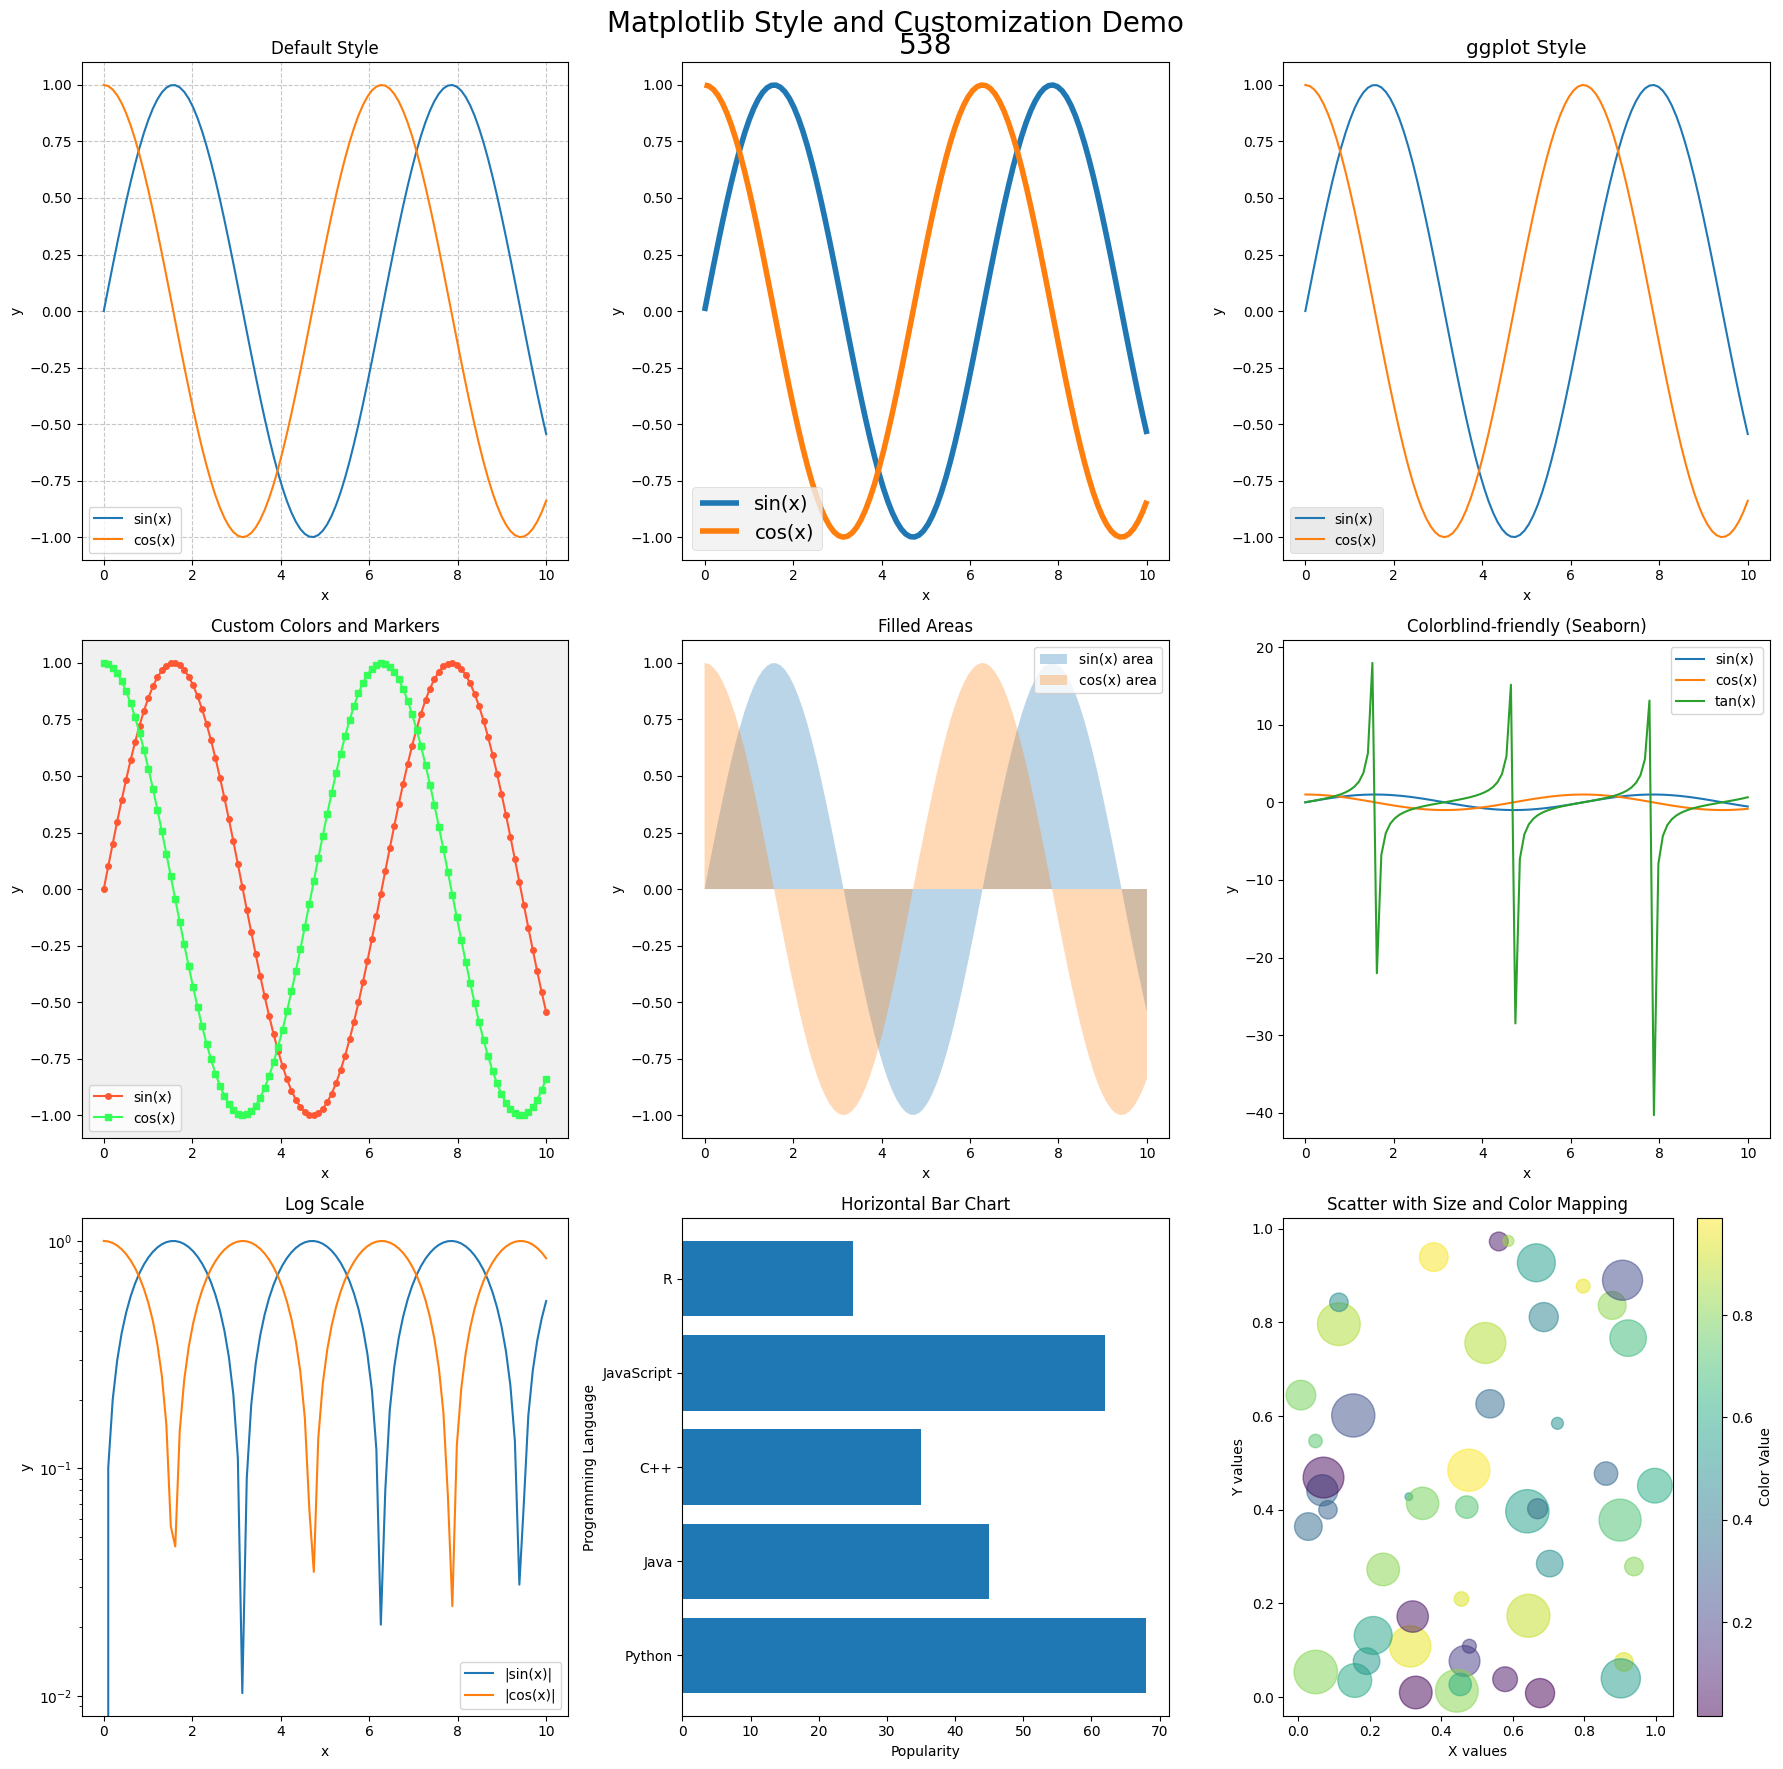

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
from cycler import cycler

# Generate sample data
x = np.linspace(0, 10, 100)
y1 = np.sin(x)
y2 = np.cos(x)
y3 = np.tan(x)

# Create a 3x3 grid of subplots with different styles
fig, axs = plt.subplots(3, 3, figsize=(18, 18))
fig.suptitle('Matplotlib Style and Customization Demo', fontsize=20)

# Function to set common properties for all subplots
def set_common_properties(ax, title):
    ax.set_title(title)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.legend()

# Plot 1: Default style
axs[0, 0].plot(x, y1, label='sin(x)')
axs[0, 0].plot(x, y2, label='cos(x)')
set_common_properties(axs[0, 0], 'Default Style')
axs[0, 0].grid(True, linestyle='--', alpha=0.7)

# Plot 2: Seaborn style
with plt.style.context('fivethirtyeight'):
    axs[0, 1].plot(x, y1, label='sin(x)')
    axs[0, 1].plot(x, y2, label='cos(x)')
    set_common_properties(axs[0, 1], '538')

# Plot 3: ggplot style
with plt.style.context('ggplot'):
    axs[0, 2].plot(x, y1, label='sin(x)')
    axs[0, 2].plot(x, y2, label='cos(x)')
    set_common_properties(axs[0, 2], 'ggplot Style')

# Plot 4: Custom colors and markers
axs[1, 0].plot(x, y1, color='#FF5733', marker='o', markersize=4, label='sin(x)')
axs[1, 0].plot(x, y2, color='#33FF57', marker='s', markersize=4, label='cos(x)')
set_common_properties(axs[1, 0], 'Custom Colors and Markers')
axs[1, 0].set_facecolor('#F0F0F0')

# Plot 5: Filled areas
axs[1, 1].fill_between(x, y1, alpha=0.3, label='sin(x) area')
axs[1, 1].fill_between(x, y2, alpha=0.3, label='cos(x) area')
set_common_properties(axs[1, 1], 'Filled Areas')

# Plot 6: Colorblind-friendly palette
with plt.style.context('seaborn-v0_8-colorblind'):
    # Use the 'colorblind' color cycle from seaborn
    plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.Set2.colors)
    
    for y, label in zip([y1, y2, y3], ['sin(x)', 'cos(x)', 'tan(x)']):
        axs[1, 2].plot(x, y, label=label)
    set_common_properties(axs[1, 2], 'Colorblind-friendly (Seaborn)')

# Plot 7: Log scale
axs[2, 0].semilogy(x, np.abs(y1), label='|sin(x)|')
axs[2, 0].semilogy(x, np.abs(y2), label='|cos(x)|')
set_common_properties(axs[2, 0], 'Log Scale')

# Plot 8: Horizontal bar chart
languages = ['Python', 'Java', 'C++', 'JavaScript', 'R']
popularity = [68, 45, 35, 62, 25]
axs[2, 1].barh(languages, popularity)
axs[2, 1].set_title('Horizontal Bar Chart')
axs[2, 1].set_xlabel('Popularity')
axs[2, 1].set_ylabel('Programming Language')

# Plot 9: Scatter plot with size and color mapping
n = 50
x = np.random.rand(n)
y = np.random.rand(n)
colors = np.random.rand(n)
sizes = 1000 * np.random.rand(n)

scatter = axs[2, 2].scatter(x, y, c=colors, s=sizes, alpha=0.5, cmap='viridis')
axs[2, 2].set_title('Scatter with Size and Color Mapping')
axs[2, 2].set_xlabel('X values')
axs[2, 2].set_ylabel('Y values')
plt.colorbar(scatter, ax=axs[2, 2], label='Color Value')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

If you have any questions about this code you want covered later in the course, open a markdown cell and let me know what it is. I don't know your <code>matplotlib</code> background, so let me know in a markdown cell! 

What you just did was one step beyond the defaults in <code>matplotlib</code> by using styles. You can find options with <code>plt.style.available</code>: [click here!](https://miro.medium.com/v2/resize:fit:5364/1*QT5UhLX452dXRmfPc1un3Q.png). But, what if a style doesn't quite meet your needs? In fact, how did people make these styles in the first place?! 

Read [this page](https://matplotlib.org/stable/users/explain/customizing.html) and bookmark this link so that you can use it later in the course.

Let's make our own style!  Again, comment this code. And, also play with the <code>rcParams</code> to see how they change the overall look of the plots. Change sizes of everything, change fonts, etc. Show some exaamples of your work.

There is a lot here to digest if you have not seen this before! Don't worry - do your best and let me know which parts are familiar and which are new to you. 

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Set custom rcParams: compare this to the codes I gave you for the first ICA
plt.rcParams.update({
    # Figure
    'figure.figsize': (4, 10),
    'figure.dpi': 400,
    # Font
    # other options fantasy, monospace, sans, sans serif,serif, or others isntalls on computer 
    'font.family': 'cursive',
    'font.size': 12,
    # Axes
    'axes.titlesize': 10,
    'axes.labelsize': 14,
    'axes.spines.top': True,
    'axes.spines.right': True,
    # Ticks
    'xtick.direction': 'out',
    'ytick.direction': 'out',
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    # Legend
    'legend.fontsize': 10,
    'legend.frameon': False,
    # Lines
    'lines.linewidth': 6,
    'lines.markersize': 18,
    # Grid
    'grid.linewidth': 0.5,
    'grid.alpha': 0.8,
    # Color cycle
    'axes.prop_cycle': plt.cycler(color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']),
})

# Generate sample data
x = np.linspace(0, 10, 100)
y1 = np.sin(x)
y2 = np.cos(x)
y3 = np.exp(-x/10) * np.sin(x)

# Create a 3x3 grid of subplots
fig, axs = plt.subplots(3, 3, figsize=(20, 20))
fig.suptitle('CMSE 830 Extra-Special Matplotlib rcParams Customization Demo', fontsize=24)

# Function to set common properties for all subplots
def set_common_properties(ax, title):
    ax.set_title(title)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.legend()

# Plot 1: Basic line plot
axs[0, 0].plot(x, y1, label='sin(x)')
axs[0, 0].plot(x, y2, label='cos(x)')
set_common_properties(axs[0, 0], 'Basic Line Plot')

# Plot 2: Scatter plot
axs[0, 1].scatter(x, y1, label='sin(x)', alpha=0.7)
axs[0, 1].scatter(x, y2, label='cos(x)', alpha=0.7)
set_common_properties(axs[0, 1], 'Scatter Plot')

# Plot 3: Line plot with markers
axs[0, 2].plot(x, y1, label='sin(x)', marker='o')
axs[0, 2].plot(x, y2, label='cos(x)', marker='s')
set_common_properties(axs[0, 2], 'Line Plot with Markers')

# Plot 4: Filled plot
axs[1, 0].fill_between(x, y1, alpha=0.3, label='sin(x) area')
axs[1, 0].fill_between(x, y2, alpha=0.3, label='cos(x) area')
set_common_properties(axs[1, 0], 'Filled Plot')

# Plot 5: Bar plot
languages = ['Python', 'Java', 'C++', 'JavaScript', 'R']
popularity = [68, 45, 35, 62, 25]
axs[1, 1].bar(languages, popularity)
axs[1, 1].set_title('Bar Plot')
axs[1, 1].set_ylabel('Popularity')

# Plot 6: Horizontal bar plot
axs[1, 2].barh(languages, popularity)
axs[1, 2].set_title('Horizontal Bar Plot')
axs[1, 2].set_xlabel('Popularity')

# Plot 7: Step plot
axs[2, 0].step(x, y3, label='exp(-x/10) * sin(x)')
set_common_properties(axs[2, 0], 'Step Plot')

# Plot 8: Multiple y-axes
ax2 = axs[2, 1].twinx()
axs[2, 1].plot(x, y1, 'b-', label='sin(x)')
ax2.plot(x, y3, 'r-', label='exp(-x/10) * sin(x)')
axs[2, 1].set_ylabel('sin(x)', color='b')
ax2.set_ylabel('exp(-x/10) * sin(x)', color='r')
axs[2, 1].set_title('Multiple Y-axes')
axs[2, 1].legend(loc='upper left')
ax2.legend(loc='upper right')

# Plot 9: Polar plot
axs[2, 2].remove()  # Remove the existing subplot
ax_polar = fig.add_subplot(3, 3, 9, projection='polar')
r = np.linspace(0, 2, 100)
theta = 4 * np.pi * r
ax_polar.plot(theta, r)
ax_polar.set_title('Polar Plot')
ax_polar.set_rticks([0.5, 1, 1.5, 2])

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

____
### AI-Assisted Learning: Correlation (10 points)

Because this HW problem uses AI, be sure to read the AI Policy and carefully follow the instructions there.

Read Chapter 2 of your textbook. Write a summary of Chapter 2 into your favorite AI. 

* Prompt the AI to expand on your summary and proivde you with additional insights. Read these.
* Prompt the AI to create a quiz with 10 multiple choice questions and ask it to grade your answers and provide extra feedback if you miss a question. 
* Think about what you understand least about what you have learned. Tell the AI what you would like to dig into more deeply, and ask for a second quiz on those customized ideas. 

In a markdown cell, write about this learning experience. 

#### Write about experience with AI-Assisted learning on chapter 2:
* I used ChatGPT-4o for this task. I first primed the LLM by asking if it would expand on my notes about correlation and it respoded with a 2 pages summarizing the fundamentals. Then I hadto stop the chat and tell it to wait for the notes. This is one thing I have noticed about chat bots, is that they sometimes respond with way more information that I need. They arenot always the most concise, or maybe I need to prompt the bot to be more concise. Then I posted my approximately 100 - 200 summary about correlation what it is, and what it is good for. The expanded notes it provided me with were of pretty high quality. For each of the main points in my notes, it exploded a sentance into a whole paragraph. The content it created was factual as far as I could tell to the best of my ability but I did notice one difference. Whereas as the book talks about the slop of regression as a measure of correlation, Chat-GPT mind a point to say this does not technically measure correlation but the description of the relationship which I think is more technically correct. Finally when I asked for a quiz it provided me with an answer key right away so I had to re-prompt which illustrates how LLMs can sometimes be too eager to please I think. 
    

____

### Projects (10 points)

Some of you already know what you want your project to be, but most of you probably haven't thought too much about it. Here, we will do a tiny practice project to get you thinking about the steps.

In this problem, you will practice finding and working with a real-world dataset, specifically the Palmer Penguins dataset. You'll explore the data, create visualizations, and propose potential research questions or projects. The goal here is to imagine you come up with an idea for your project and you want to get started with it, which begins with finding the data. 

Let's imagine you are very interested in penguins....

#### Instructions

1. **Data Acquisition**

   - Find and download the Palmer Penguins dataset.
   - Document the source of the dataset and the process you used to obtain it.

2. **Dataset Overview**

   Write a brief summary (100-200 words) addressing the following:
   - What is the Palmer Penguins dataset?
   - Who collected this data and for what purpose?
   - What variables are included in the dataset?
   - How many observations does the dataset contain?

3. **Data Utility**

   In another 100-200 words, discuss:
   - What kinds of research questions or analyses is this dataset suitable for?
   - How might this dataset be used in the field of data science or related disciplines?

4. **Exploratory Data Analysis**

   Using Python, perform a basic exploratory data analysis of the Penguins dataset:
   - Create at least two different types of plots that reveal interesting aspects of the data. 
     (e.g., distribution of penguin species, relationship between bill length and bill depth, etc.)
   - For each plot, write a brief description (2-3 sentences) explaining what the visualization shows and any insights it provides.

Remember, the goal is to demonstrate your ability to work independently with a new dataset. _Focus on clear communication of your findings and ideas rather than complex analyses at this stage._

If you are not great and finding and downloading datasets yet, here is a _hint:_ there are many places to find this one, but using the Seaborn library is convenient: <code>import seaborn as sns; penguins = sns.load_dataset("penguins")</code>

##### Dataset Overview:
Data was collected by Dr. Kristen Gorman and the Palmer Station at the Antartica Long Term Ecologicial Research Station between 2007 and 2009 to study penguin ecology. The data was first released on R in order to provide an alternative to the popular "Iris" dataset. The data contains 3 nominal categortical features(species, island, sex) and 4 numerical measurements (bill_length, bill_depth, flipper_length, body_mass). There are 344 observations in the dataset.

##### Data Utility:
The factors collected are species, island, and sex while the measurements are about anatomical sizes. This implies the data could be useful for researchers who are interested in how differences in body size might be influenced by species, island, or sex. Perhaps the islands are in a lattitudinal gradient which might allow researchers to answer questions about migration or climate change. Note of interest is that in other versions of this data set there is a "Year" factor but it is absent in Seaborn version. From the [original release](https://allisonhorst.github.io/palmerpenguins/articles/intro.html), it seems like the authors intended for this dataset to be an alternative for the popular Iris dataset when it comes to data science education. 

In [7]:
# Data Acquisition #
penguins = sns.load_dataset('penguins')
print(penguins.describe())
print(penguins.info())

       bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
count      342.000000     342.000000         342.000000   342.000000
mean        43.921930      17.151170         200.915205  4201.754386
std          5.459584       1.974793          14.061714   801.954536
min         32.100000      13.100000         172.000000  2700.000000
25%         39.225000      15.600000         190.000000  3550.000000
50%         44.450000      17.300000         197.000000  4050.000000
75%         48.500000      18.700000         213.000000  4750.000000
max         59.600000      21.500000         231.000000  6300.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-nul

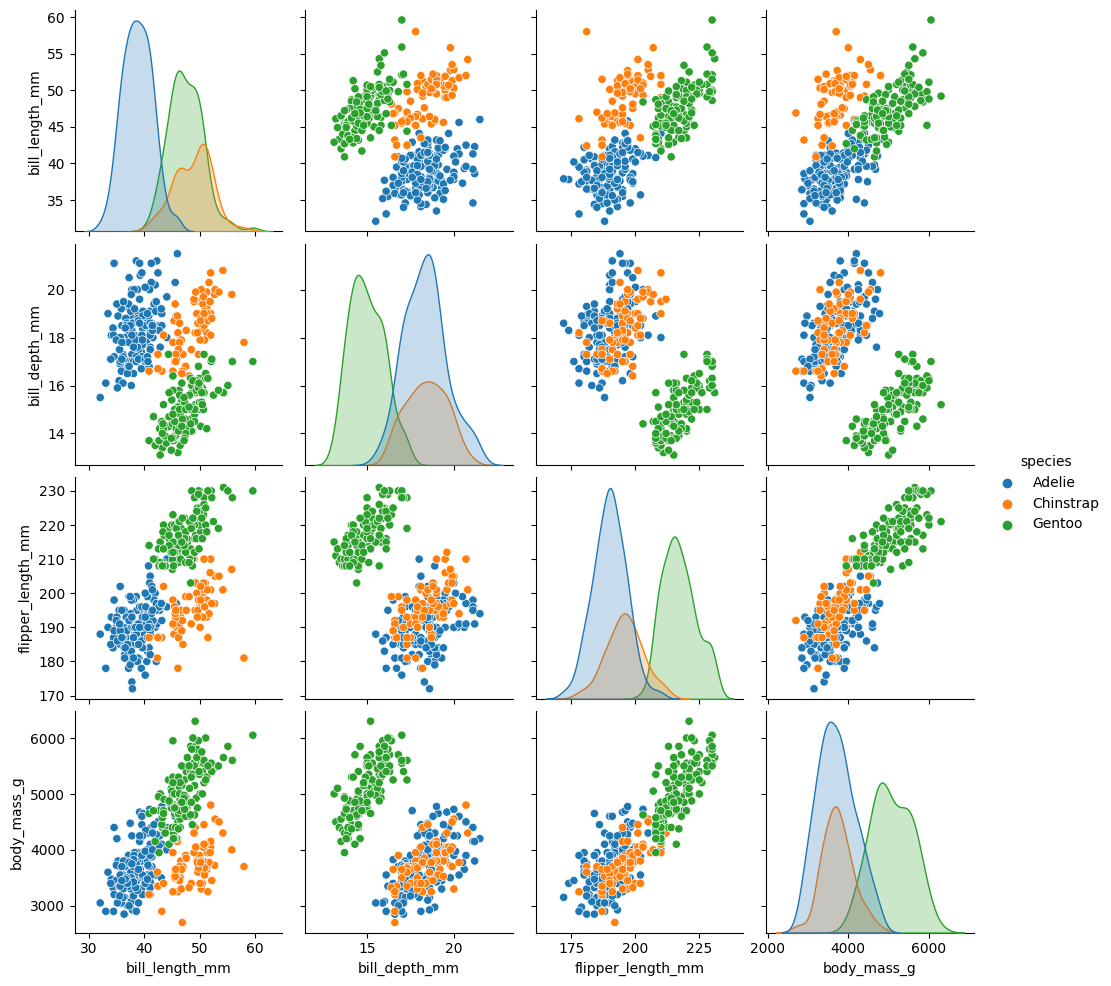

In [8]:
# Data Exploration #
sns.pairplot(data=penguins, hue = 'species')

# From this pair plot by species figure we see that the species have significantly different body shapes and sizes. Interestingly, the Adelie and Chinstrap types appear to be more similar
# to each other in every measurement except for bill length. A follow up question could be whether these differences in size could be due to other factors such as sex or island. 

____

### Scaling Data (10 points)

In this problem you will examine a very popular dataset and scale it. Your only job: comment every line of this code and explain what it does. 

Original data:
Means: [5.84333333 3.05733333 3.758      1.19933333]
Standard deviations: [0.82530129 0.43441097 1.75940407 0.75969263]

Scaled data:
Means: [-1.69031455e-15 -1.84297022e-15 -1.69864123e-15 -1.40924309e-15]
Standard deviations: [1. 1. 1. 1.]

Maximum difference between original and reconstructed data: 2.220446049250313e-16


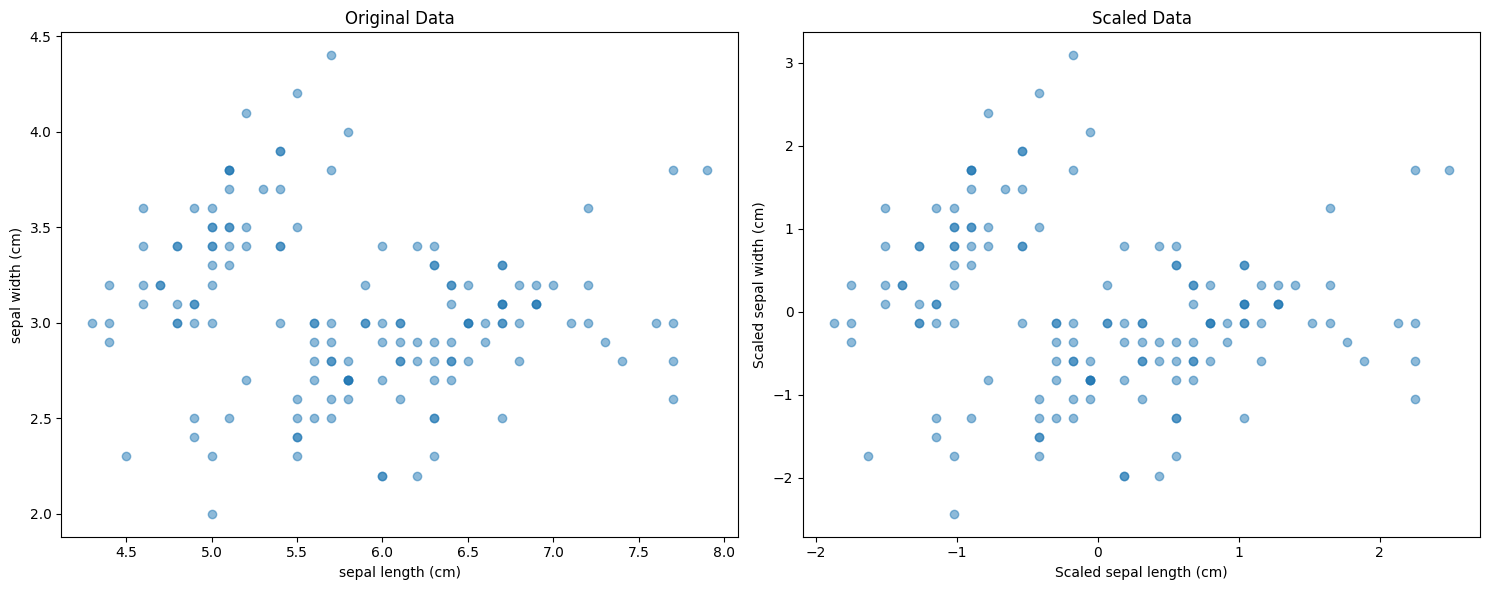

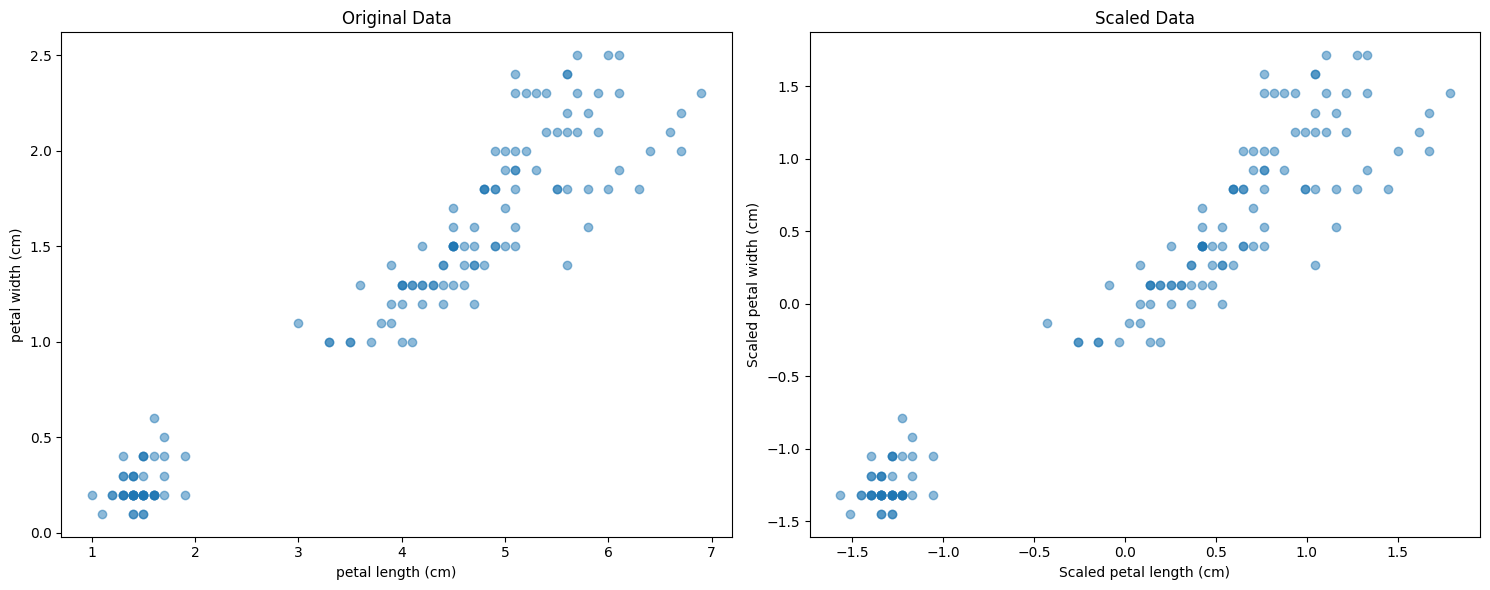

In [5]:
# These lines import libraries with functions and datasets needed for work
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

# Restore the default matplotlib style 
plt.rcdefaults()

# from sklearn.datasets load Iris bunch 
iris = load_iris()
# access data attribute from iris which are values of feature names
X = iris.data
# feature names attribute to know what the heck we are looking at
feature_names = iris.feature_names

# create scaler object
scaler = StandardScaler()

# z normalize x values to make comparisons between features more fair
X_scaled = scaler.fit_transform(X)

# create multi-plot figure skeleton that is 1 row and 2 cols wide
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# in left subplot, make scatter from unscaled data of first 2 features 
ax1.scatter(X[:, 0], X[:, 1], alpha=0.5)
# set title with string value
ax1.set_title('Original Data')
# set x and y labels using corresponding element in feature names list
ax1.set_xlabel(feature_names[0])
ax1.set_ylabel(feature_names[1])

# in right subplot, make scatter from scaled data of first 2 features 
ax2.scatter(X_scaled[:, 0], X_scaled[:, 1], alpha=0.5)
ax2.set_title('Scaled Data')
# set x and y label with f-string formatting to specify "Scaled"
ax2.set_xlabel(f'Scaled {feature_names[0]}')
ax2.set_ylabel(f'Scaled {feature_names[1]}')

# adjust plots so that elements fit inside figure area without overlapping for clarity
# from matplotlib docs " It only checks the extents of ticklabels, axis labels, and titles."
plt.tight_layout()

# create a blank slate 
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# in left subplot, make scatter from unscaled data of features 3 and 4 
ax1.scatter(X[:, 2], X[:, 3], alpha=0.5)
ax1.set_title('Original Data')
ax1.set_xlabel(feature_names[2])
ax1.set_ylabel(feature_names[3])

# in right subplot, make scatter from scaled data of features 3 and 4 
ax2.scatter(X_scaled[:, 2], X_scaled[:, 3], alpha=0.5)
ax2.set_title('Scaled Data')
ax2.set_xlabel(f'Scaled {feature_names[2]}')
ax2.set_ylabel(f'Scaled {feature_names[3]}')

plt.tight_layout()

# Performing calculations on original data, print out for clarity
print("Original data:")
# calculate means down the 0-th axis (per col or feature)
print("Means:", np.mean(X, axis=0))
# calculate std dev down 0th axis
print("Standard deviations:", np.std(X, axis=0))

# Performing calcualtions on scaled data print new line first "\n"
print("\nScaled data:")
print("Means:", np.mean(X_scaled, axis=0))
print("Standard deviations:", np.std(X_scaled, axis=0))

# undo the z-scale transformation from earlier to know it and see how it works
X_reconstructed = scaler.inverse_transform(X_scaled)

# check for the max absolute difference from subtracting 2 arrays on per value basis 
# see how index is preserved
max_diff = np.max(np.abs(X - X_reconstructed))#.round(5) to see how difference is basically 0
# print new line and f-string with max diff variable 
print(f"\nMaximum difference between original and reconstructed data: {max_diff}")

# Homework Task: Comment on every line of this code, explaining what it does and why it's important.

_____

### Encoding (10 points)

In this problem, you will work with the Titanic dataset to explore and apply various encoding techniques for both categorical and numerical data. You'll analyze the impact of different encoding methods on data representation and visualization.

#### Instructions

1. **Data Acquisition and Setup**

   Use the code to load the Titanic dataset and perform initial setup: see code below.

2. **Dataset Overview**

   Write a brief report (100-200 words) addressing the following:
   - What is the Titanic dataset?
   - What variables are included in the dataset?
   - Identify which variables are categorical and which are numerical.
   - Describe any missing or inconsistent data you observe.

3. **Basic Data Visualization**

   Run and comment the code to create some basic visualizations of the data: see code below.

   Interpret these visualizations in 1-2 sentences each.

4. **Encoding Techniques**

   For each of the following encoding techniques, apply them to appropriate variables in the dataset and _write a short explanation (50-100 words)_ of how the technique works and its potential impact on analysis. The code is given: you simply need to write in a markdown what the output means. 


##### Dataset Overview
 * The titanic dataset contains information on passengers from the ill-fated ship. The variables are:
   * Survived: categorical
   * Pclass: categorical
   * Name: categorical
   * Sex: categorical
   * Age: numerical
   * Sib/Spous Aboard: numerical
   * Parents/Child Aboard: numerical
   * Fare: numerical

* I do not notice any missing data. Some of the categorical data like survived and pclass are stored as integers which might affect analysis. 

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer

# Load the dataset
url = "https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv"
df = pd.read_csv(url)

# Display basic information about the dataset
print(df.info())
print(df.describe())

# Check for missing values
print(df.isnull().sum())

# Display the first few rows
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 887 non-null    int64  
 1   Pclass                   887 non-null    int64  
 2   Name                     887 non-null    object 
 3   Sex                      887 non-null    object 
 4   Age                      887 non-null    float64
 5   Siblings/Spouses Aboard  887 non-null    int64  
 6   Parents/Children Aboard  887 non-null    int64  
 7   Fare                     887 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.6+ KB
None
         Survived      Pclass         Age  Siblings/Spouses Aboard  \
count  887.000000  887.000000  887.000000               887.000000   
mean     0.385569    2.305524   29.471443                 0.525366   
std      0.487004    0.836662   14.121908                 1.104669   
min     

When you read in a dataset like this one, I highly recommend you always look at it with something as simple as:

In [7]:
df

Survived  Pclass                                               Name  \
0           0       3                             Mr. Owen Harris Braund   
1           1       1  Mrs. John Bradley (Florence Briggs Thayer) Cum...   
2           1       3                              Miss. Laina Heikkinen   
3           1       1        Mrs. Jacques Heath (Lily May Peel) Futrelle   
4           0       3                            Mr. William Henry Allen   
..        ...     ...                                                ...   
882         0       2                               Rev. Juozas Montvila   
883         1       1                        Miss. Margaret Edith Graham   
884         0       3                     Miss. Catherine Helen Johnston   
885         1       1                               Mr. Karl Howell Behr   
886         0       3                                 Mr. Patrick Dooley   

        Sex   Age  Siblings/Spouses Aboard  Parents/Children Aboard     Fare  
0      male  22.0                        1                        0   7.2500  
1    female  38.0                        1                        0  71.2833  
2    female  26.0                        0                        0   7.9250  
3    female  35.0                        1                        0  53.1000  
4      male  35.0                        0                        0   8.0500  
..      ...   ...                      ...                      ...      ...  
882    male  27.0                        0                        0  13.0000  
883  female  19.0                        0                        0  30.0000  
884  female   7.0                        1                        2  23.4500  
885    male  26.0                        0                        0  30.0000  
886    male  32.0                        0                        0   7.7500  

[887 rows x 8 columns]

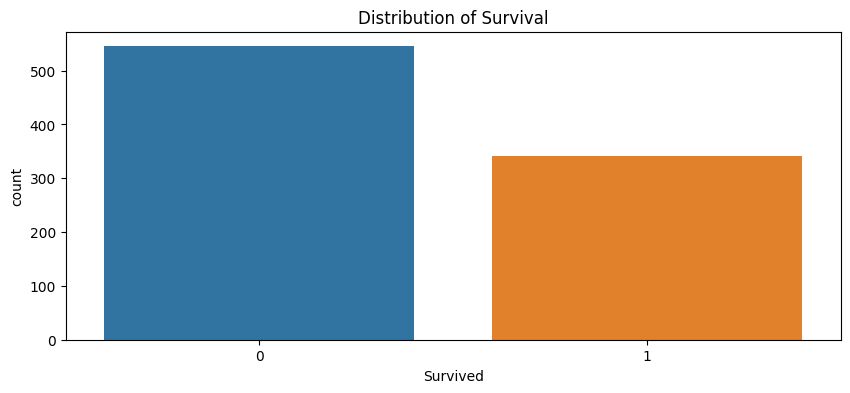

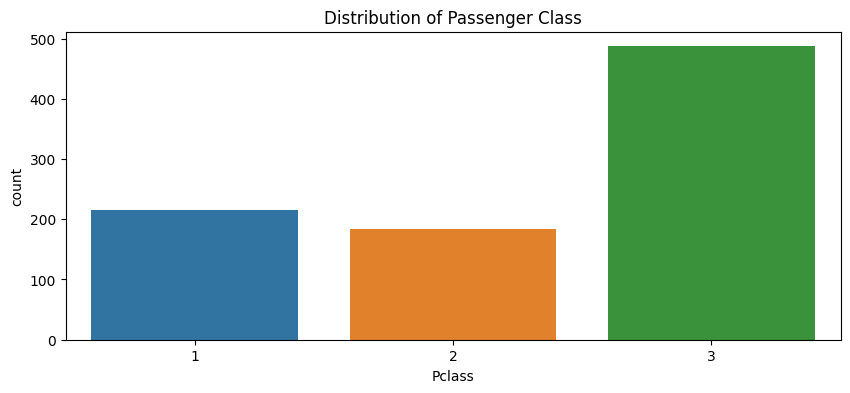

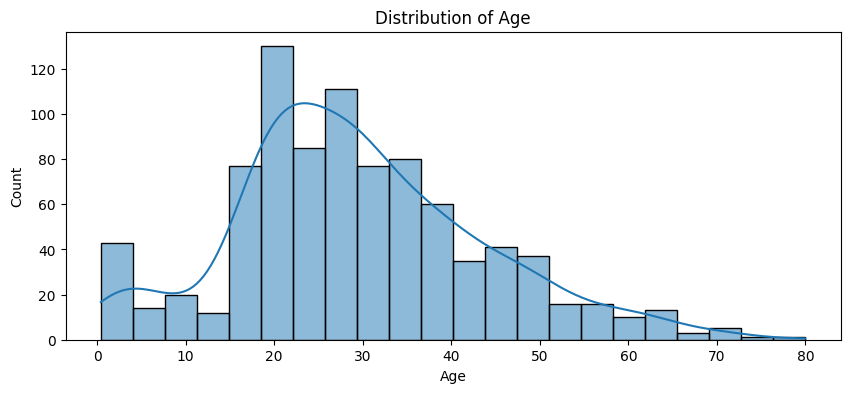

In [8]:
 # Visualize the distribution of the 'Survived' variable
plt.figure(figsize=(10, 4))
sns.countplot(x='Survived', data=df)
plt.title('Distribution of Survival')
plt.show()
# A majority of passengers did not survive.

# Visualize the distribution of 'Pclass'
plt.figure(figsize=(10, 4))
sns.countplot(x='Pclass', data=df)
plt.title('Distribution of Passenger Class')
plt.show()
# A large majority of passengers were in class 3.

# Visualize the distribution of 'Age'
plt.figure(figsize=(10, 4))
sns.histplot(df['Age'].dropna(), kde=True)
plt.title('Distribution of Age')
plt.show()
# There are a lot of babies on the titanic but mostly people in 20s. 

## One-Hot Encoding:
 * For nominal features that do not have a natural ranking
 * The feature is replaced with a binary variable for each unique class 

In [9]:
# one-hot encoding
onehot = OneHotEncoder()
encoded = onehot.fit_transform(df[['Pclass']])

# create feature names manually
unique_values = sorted(df['Pclass'].unique())
feature_names = [f'Pclass_{val}' for val in unique_values]

# convert to DataFrame
encoded_df = pd.DataFrame(encoded.toarray(), columns=feature_names)
print(encoded_df.head())

   Pclass_1  Pclass_2  Pclass_3
0       0.0       0.0       1.0
1       1.0       0.0       0.0
2       0.0       0.0       1.0
3       1.0       0.0       0.0
4       0.0       0.0       1.0


## Label Encoder:
 * Encode each unique label to an integer between 0 and n_labels - 1
 * Appropriate for encoding target labels in machine learning classification tasks

In [10]:
le = LabelEncoder()
df['Sex_encoded'] = le.fit_transform(df['Sex'])
print(df[['Sex', 'Sex_encoded']].head())

      Sex  Sex_encoded
0    male            1
1  female            0
2  female            0
3  female            0
4    male            1


## Ordinal Encoder:
 * Encode each unique label to an integer between 0 and n_labels - 1
 * Appropriate for encoding categorical input features as integers when there is a known relationship between categories (e.g. 1st, 2nd, 3rd class)

In [12]:
oe = OrdinalEncoder()
df['Pclass_ordinal'] = oe.fit_transform(df[['Pclass']])
print(df[['Pclass', 'Pclass_ordinal']].head())

   Pclass  Pclass_ordinal
0       3             2.0
1       1             0.0
2       3             2.0
3       1             0.0
4       3             2.0


## Binary Encoder
 * Encode categorical features as binary values (01, 10, 11)
 * Appropriate when required for operating systems and low level computer communication 

In [13]:
def custom_binary_encode(value):
    return format(value, '02b')

df['Pclass_binary'] = df['Pclass'].apply(custom_binary_encode)
print(df[['Pclass', 'Pclass_binary']].head())

   Pclass Pclass_binary
0       3            11
1       1            01
2       3            11
3       1            01
4       3            11


## Frequency Encoding:
 * Encode each unique label as the the proportion of total population
 * Appropriate when assigning weights to labels

In [40]:
freq_encoding = df.groupby('Pclass').size()/len(df)
df['Pclass_freq'] = df['Pclass'].map(freq_encoding)
print(df[['Pclass', 'Pclass_freq']].head())

   Pclass  Pclass_freq
0       3     0.549042
1       1     0.243517
2       3     0.549042
3       1     0.243517
4       3     0.549042
